# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [8]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [9]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) #to display values upto 2 decimal places

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')
data_orig = data.copy()

In [56]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The dataset has been loaded properly.
* Dataset consists of several columns displaying the various attributes related to each order
* order_id column display the unique order Id for each order
* cutomer_id column display the ID assigned to each customer who has ordered the food
* restaurant_name and cuisine_type columns displays the name of the restaurant and the corresponding cuisine_type  for which order was placed
* cost_of_the_order column provides information on the price of the order that was placed
* day_of_the_week provides details of the day when was it placed like weekend or weekday
* rating column displays the rating given by the customer for that particular order
* food_preparation_time and delivery_time columns provides information on time taken by restaurant to prepare the   order and time taken by the food aggregator company to deliver the order to the customer

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [57]:
# Write your code here
data.shape

(1898, 9)

#### Observations: 
* The Dataset has 1898 number of rows with 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [58]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
* There are 4 int64, 4 object and 1 float64 datatypes in the dataset. 
* We can observe that there are no null values in the dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [59]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
* As per the above, there are no null values in any of the columns in the dataset. But we observed from the first 5 rows of the dataset that there are some rows that are mentioned as 'Not Given' in the 'rating' column which means that the actual values are missing or not provided or not captured. And those number can be seen from the value_counts() function

In [60]:
data['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

As there are 736 rows which do not have any ratings mentioned and this is around 40% of the total rating rows. Hence we can replace these values with NaN and then apply appropriate treatment of those missing/null values if needed

In [61]:
data_copy=data.copy() ## Creating a copy of the original data to perform the imputation without changing the actual dataset and check which method to be applied if needed

In [62]:
data_copy.groupby('restaurant_name')['rating'].apply(lambda x: (x=='Not given').mean()).sort_values(ascending=False).head(10)

restaurant_name
Lamarca Pasta                1.00
Big Wong Restaurant _¤¾Ñ¼   1.00
Friend of a Farmer           1.00
Gaia Italian Cafe            1.00
Hangawi                      1.00
Hiroko's Place               1.00
La Follia                    1.00
Crema Restaurante            1.00
Coppola's East               1.00
Le Zie 2000 Trattoria        1.00
Name: rating, dtype: float64

This shows that missing values do not depend on any of the restaurants hence these are not Missing at Random

In [63]:
data_copy.groupby('rating')['cost_of_the_order'].mean()

rating
3           16.22
4           16.71
5           16.97
Not given   16.09
Name: cost_of_the_order, dtype: float64

In [64]:
data_copy.groupby('rating')['delivery_time'].mean()

rating
3           24.56
4           23.87
5           24.21
Not given   24.17
Name: delivery_time, dtype: float64

In [17]:
data_copy['rating']=data_copy['rating'].replace('Not given',np.nan) ## Replacing the 'Not given' values with NaN

In [10]:
data_copy['rating'].value_counts(dropna=False)

NaN    736
5      588
4      386
3      188
Name: rating, dtype: int64

In [22]:
## Converting the rating column type to int type for further calculations/analysis or imputation
data_copy['rating'] = pd.to_numeric(data['rating'], errors='coerce')

We do not know the exact reason of these 'Not given' values but it seems that customers did not choose to rate these orders knowingly.

In [39]:
data_copy.groupby('restaurant_name')['rating'].apply(lambda x: (x=='Null').mean()).sort_values(ascending=False).head(10)

restaurant_name
'wichcraft                  0.00
Saravanaa Bhavan            0.00
Philippe Chow               0.00
Piccolo Angolo              0.00
Pinto Nouveau Thai Bistro   0.00
Pongsri Thai                0.00
Posto                       0.00
Prosperity Dumpling         0.00
Pylos                       0.00
Ravagh Persian Grill        0.00
Name: rating, dtype: float64

In [41]:
data_copy.groupby('rating')['cost_of_the_order'].mean()

rating
3.00   16.22
4.00   16.71
5.00   16.97
Name: cost_of_the_order, dtype: float64

In [40]:
data_copy.groupby('rating')['delivery_time'].mean()

rating
3.00   24.56
4.00   23.87
5.00   24.21
Name: delivery_time, dtype: float64

We do not know the exact reason of these 'Not given' values but it seems that customers did not choose to rate these orders knowingly or for some other reason and thats why we will leave these values as is

#### Observations: 

Overall,we could observe that the dataset has 1898 rows with 9 columns with no null values present in the data.However from the top 5 rows of the data shows that rating column has "Not given" mentioned instead of rating. And the value_counts shows that we have around 736 rows of "Not given" in this column which is around 40%. But as we do not know the exact reason of these missing values and it seems the customers might have knowingly did not rate these orders which is important to capture instead of imputing the values . And moreover we have around 60% of the dataset which can be used for our analysis


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [65]:
# Write your code here
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

The minimum it takes for food to be prepared is 20 mins and it takes maximum of 35 mins to prepare food. And on an average, it takes 27.37 mins to prepare food

* The above table displays the descriptive analysis for Numerical columns
* On an average, delivery takes around 24 mins to deliver the order once the food is prepared and the food prepartion itself takes around 27 mins to be prepared once the order is placed
* Average cost of the order is 16.5 and around 50% of the orders cost less than the average.
* Shake Shack is the most popular restaurant and American is the most preferred cuisine
* Around 71% of the orders are placed on weekends


### **Question 5:** How many orders are not rated? [1 mark]

In [67]:
# Write the code here
data['rating'].value_counts() ## This is used to count the no of unique values in the rating column

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* As we can observe that there are 736 orders that are not rated by the customers

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order_ID

In [68]:
# check unique order ID
data['order_id'].nunique()

1898

In [69]:
# check unique customer ID
data['customer_id'].nunique()

1200

This shows that there are repiting customers who have ordered more than once from this food aggregator company app online

In [76]:
data['customer_id'].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

This shows that the customers with id '52832' and '47440' are top repeat customers which shows some good engagement 

## Lets explore the categorical variables

In [70]:
# check unique restaurant name
data['restaurant_name'].nunique()

178

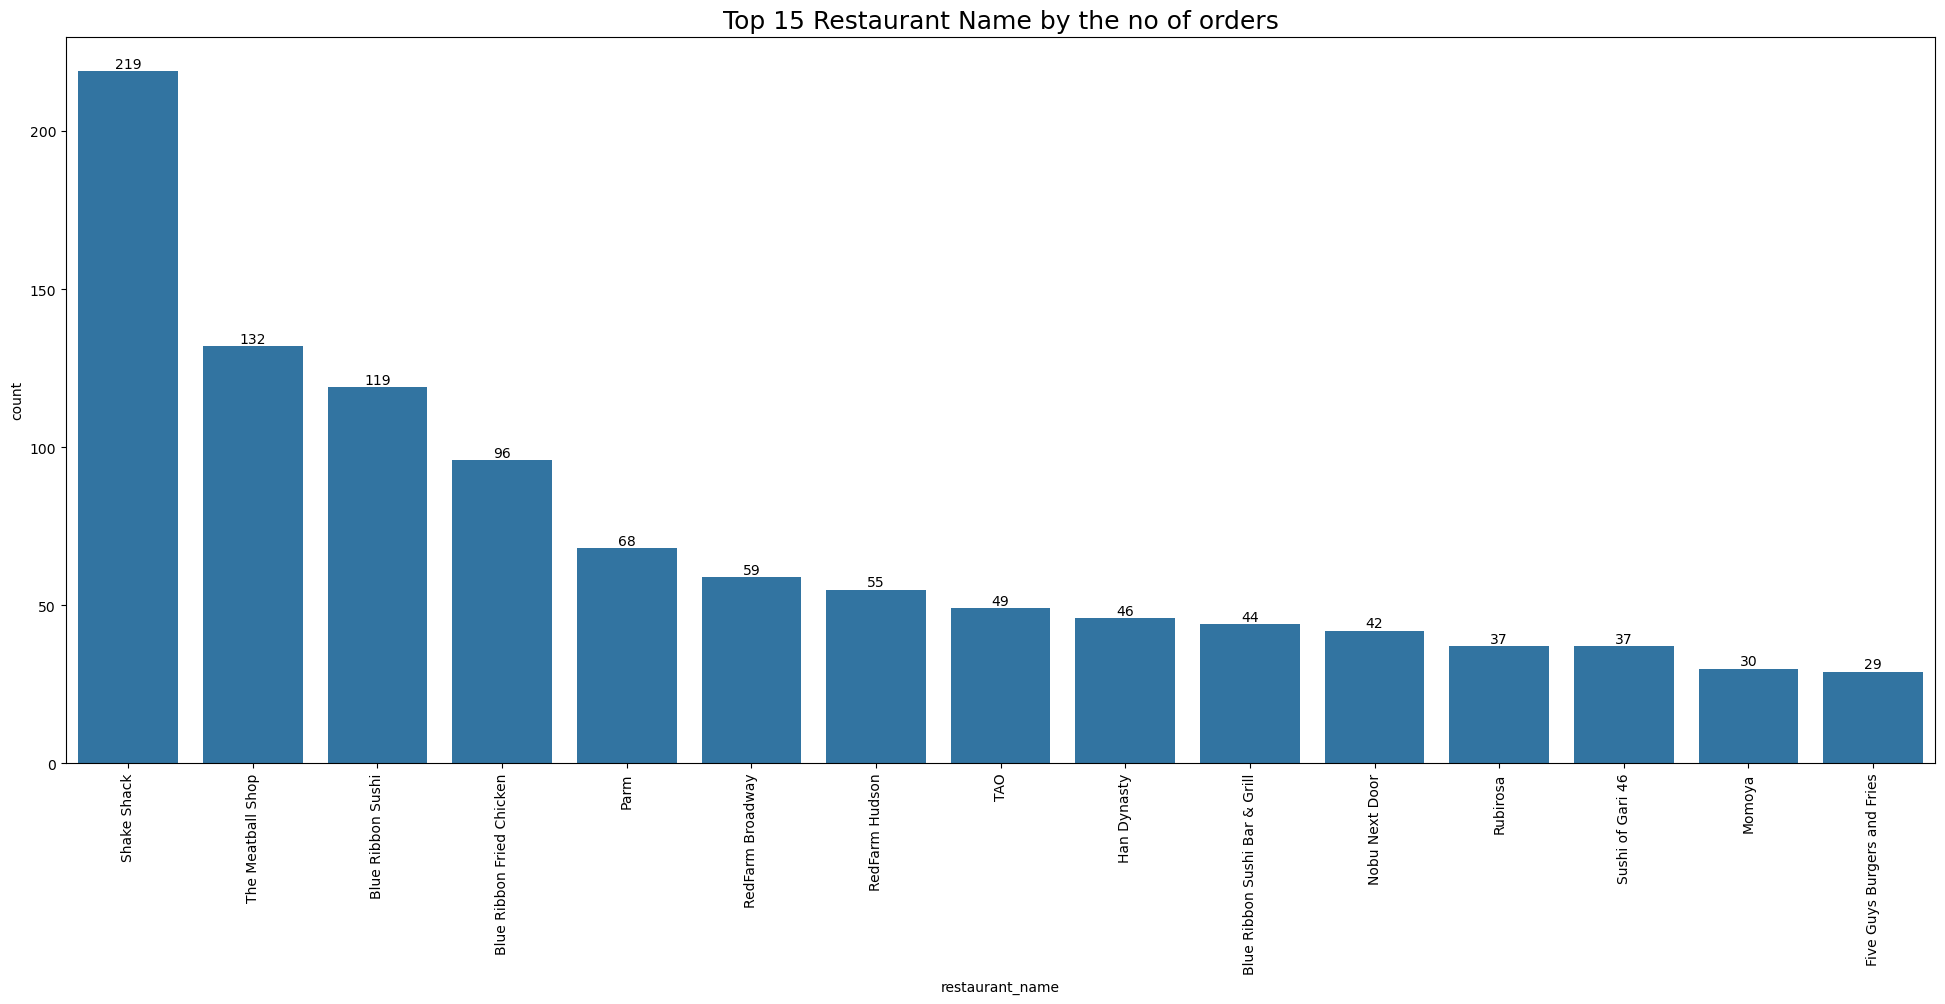

In [86]:
plt.figure(figsize=(20,8))
plot = sns.countplot(data = data, x='restaurant_name',order=data['restaurant_name'].value_counts().nlargest(15).index);
plt.tight_layout()
for container in plot.containers:
    plot.bar_label(container)
plt.xticks(rotation=90);
plt.title('Top 15 Restaurant Name by the no of orders',fontsize = 18);

* As there are 178 restaurants to be analysed in a graph which is not easy to interpret, hence we displayed the top 15 resaurants as per the no of orders. And we observe that 'Shake Shack' is the top restaurant which has received the highest no of orders followed by 'The Meatball Shop'

In [72]:
# check unique cuisine type
data['cuisine_type'].nunique()

14

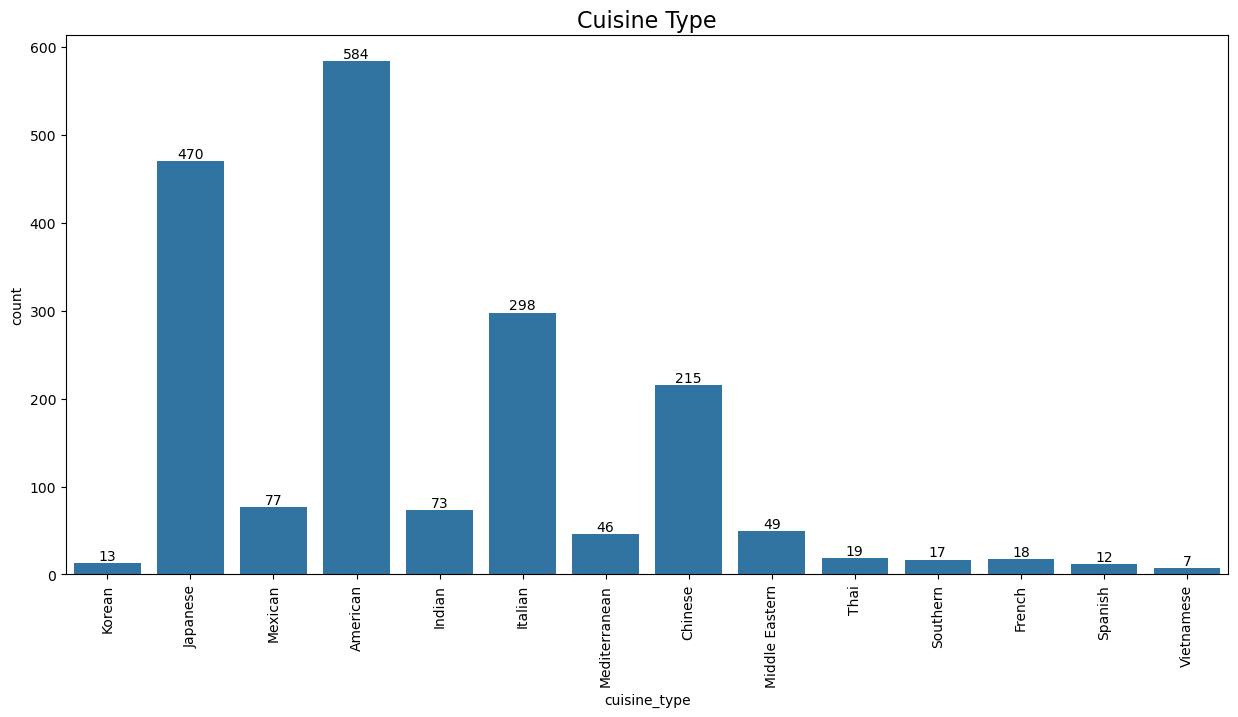

In [88]:
plt.figure(figsize=(15,7))
plot = sns.countplot(data = data, x='cuisine_type');
for container in plot.containers:
    plot.bar_label(container)
plt.xticks(rotation=90);
plt.title('Cuisine Type',fontsize = 16);

The top 3 cuisine types are American, Japanese and Italian. American being the most popular of all.
The bottom 3 cuisine types are Vietnamese, Spanish and Korean.

In [94]:
# check unique rating
data['rating'].nunique()

4

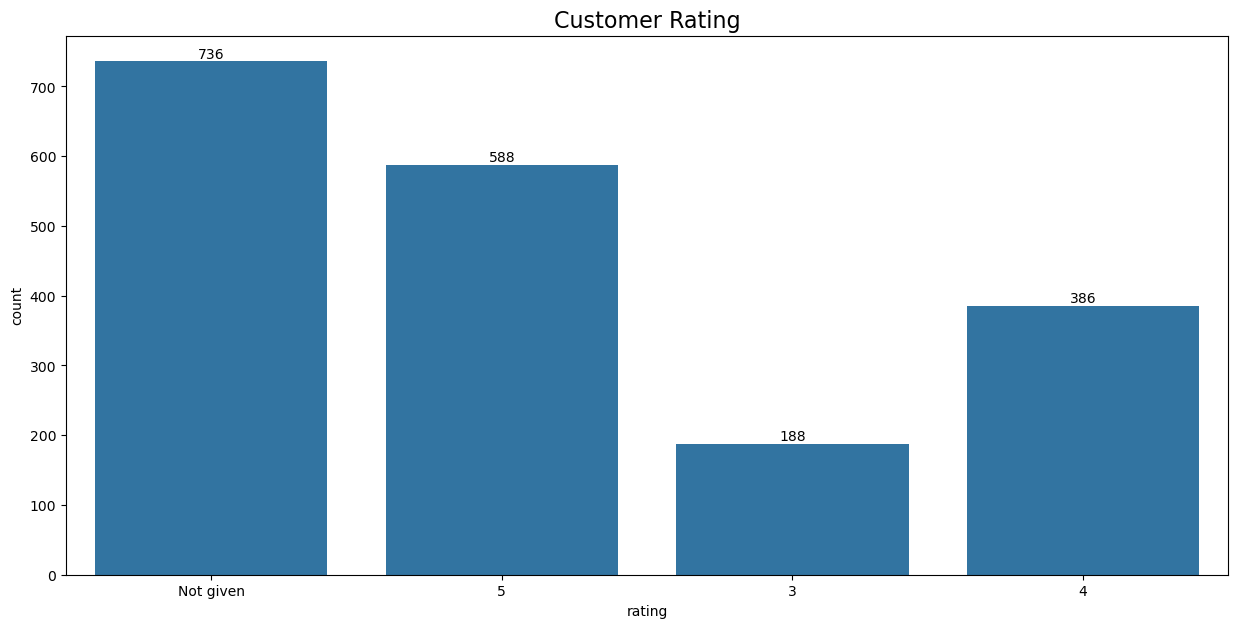

In [90]:
plt.figure(figsize=(15,7))
plot = sns.countplot(data = data, x='rating');
for container in plot.containers:
    plot.bar_label(container)
plt.title('Customer Rating',fontsize = 16);

In [81]:
# check unique values for the day of the week
data['day_of_the_week'].nunique()

2

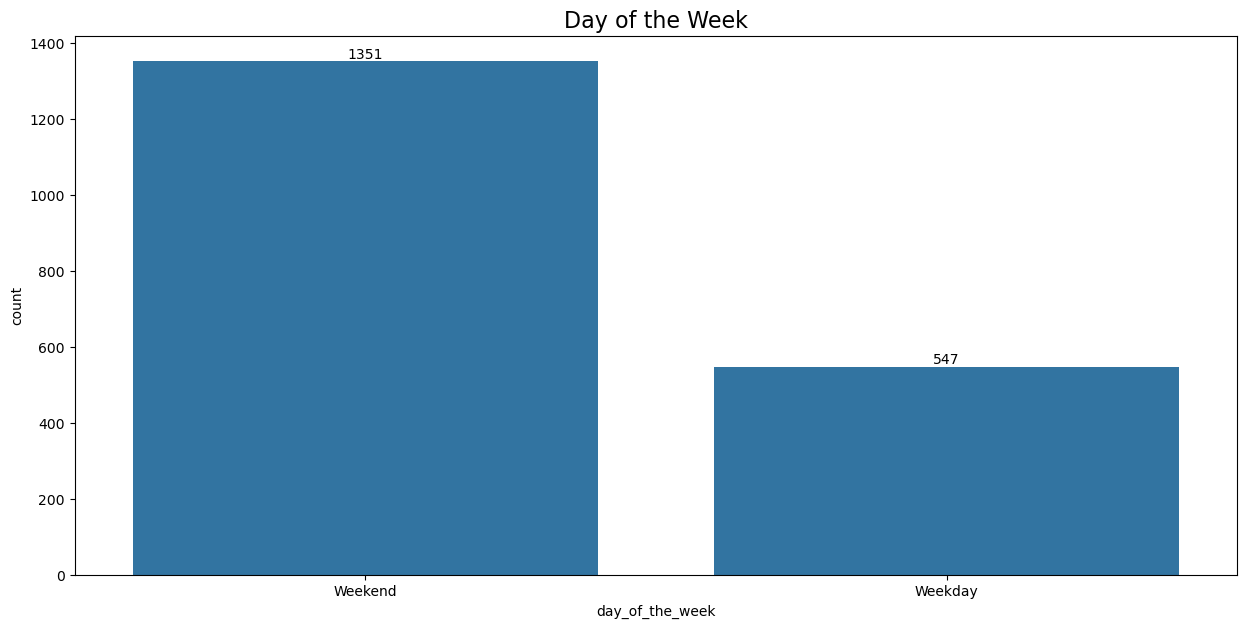

In [91]:
plt.figure(figsize=(15,7))
plot = sns.countplot(data = data, x='day_of_the_week');
for container in plot.containers:
    plot.bar_label(container)
plt.title('Day of the Week',fontsize = 16);

* We can observe that more orders are placed on weekend as compared to Weekday. They are more than double of the orders that are placed on weekday.

## Lets explore numerical variables

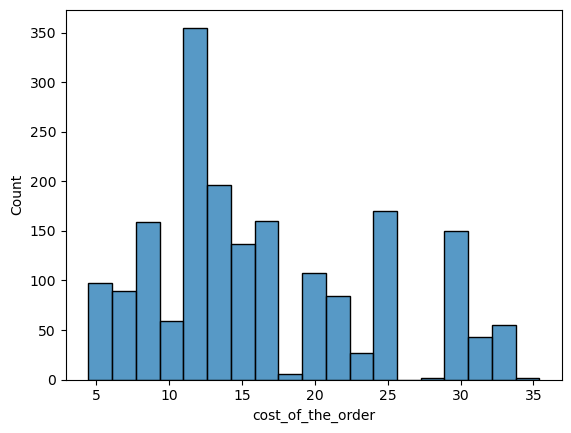

In [92]:
# Write the code here
sns.histplot(data = data, x='cost_of_the_order');

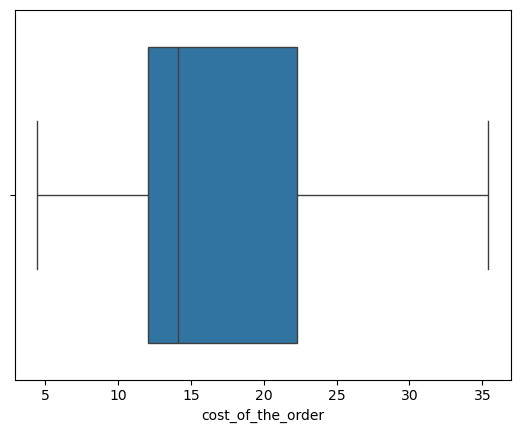

In [93]:
sns.boxplot(data = data, x='cost_of_the_order');

* From the histplot, we can see that there are multiple peaks which shows that there are different groups of orders
* The most common order cost appears to be around 10-12.
* The order costs range approximately from 4 to 35
* As per the boxplot, we can observe that the cost of the order distribution is slightly right skewed. 
* The median cost of the order is around 15, meaning half of the orders cost less than or equal to 15, and half cost more.
* The box (from Q1 to Q3) represents the middle 50% of the data, roughly ranging from 13 to 23.
* There appear to be no outliers in this plot, as there are no individual points beyond the whiskers.
* IQR of the plot = Q3 - Q1 = 10.22

As we can observe that the median is closer to Q1 which shows that it is right skewed but the median is very close to mean so we can say it is slightly skewed but there is no right whisker which also indicates that this is left skewed. So quantatively, we tried using Quartile coefficient of skewness $K = ((Q3-Q2)-(Q2-Q1))/(Q3-Q1)$ and this K is 0.34 which is greater than 0 indicating a right skewed distribution

Most of the ratings are on the higher side and there are no ratings below 3

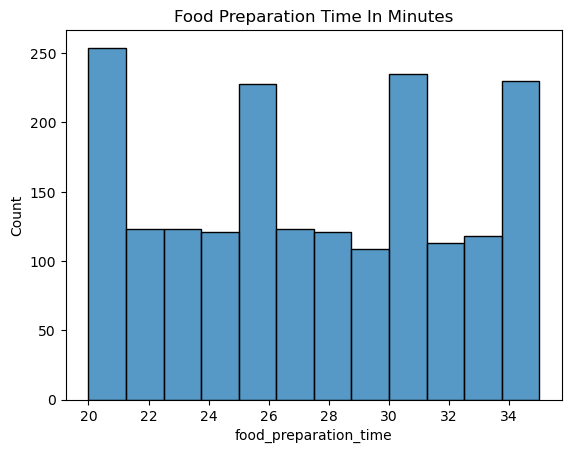

In [102]:
sns.histplot(data = data, x ='food_preparation_time');
plt.title('Food Preparation Time In Minutes');

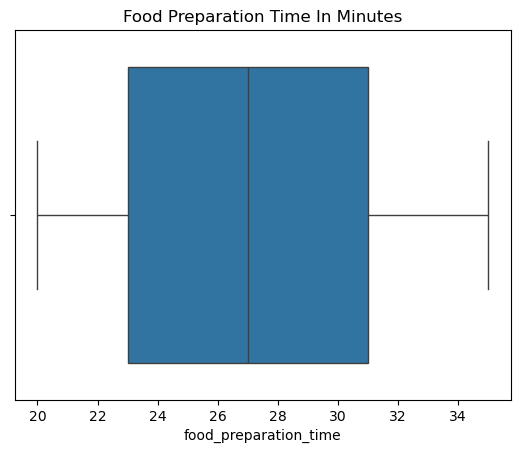

In [103]:
sns.boxplot(data = data, x ='food_preparation_time');
plt.title('Food Preparation Time In Minutes');

* The food_preparation_time seems to be of uniform distribution typically ranging from 20 to 35 mins.
* From the histplot, we can see that there are higher frequencies for some of the values of the food preparation time
* From the boxplot, it seems there are no outliers present in this data


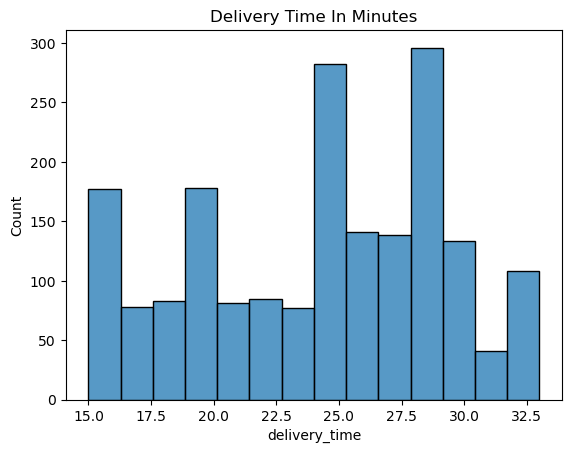

In [104]:
sns.histplot(data=data, x='delivery_time');
plt.title('Delivery Time In Minutes');

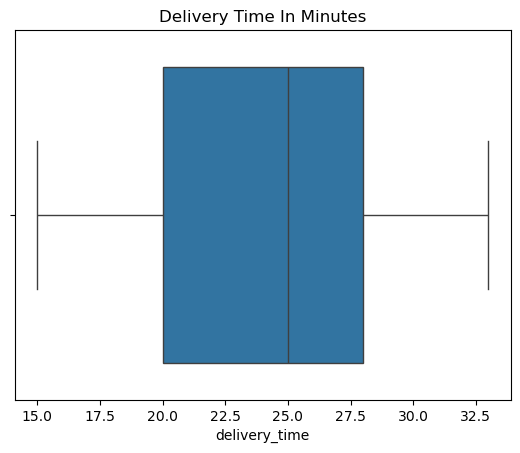

In [105]:
sns.boxplot(data=data, x='delivery_time');
plt.title('Delivery Time In Minutes');

* The distribution seems to be of slightly left skewed distribution
* The overall range of delivery times is approximately from 15.0 minutes to 32.5 minutes.
* The histogram shows that the most frequent delivery times occur between 27.5 and 30.0, with a particularly high count around the 27.5 to 28.75 minute mark. Another frequent range of delivery times is between 24.0 and 26.5 minutes. The least frequent delivery times are between 30.0 and 31.25 minutes.
* The median is at 25 mins which says that 50% of the deliveries take less than or eqaul to 25 mins
* As per the boxplot, there are no outliers present in the data for Delivery time 
* The box represents the interquartile range (IQR), which contains the middle 50% of the delivery times which ranges from approximately 20.0 minutes (Q1) to about 28.0 minutes (Q3).



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [106]:
# Write the code here
data['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
* The top restaurant that has received the maximun number of orders received is Shake Shack followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [109]:
data[data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(5)## This gives all the unique values of cuisine type with their counts ordered during weekends and displaying the top 5 of those cuisine types

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [110]:
data.loc[data['day_of_the_week']=='Weekend','cuisine_type'].mode()[0] ## This will give directly the most ordered cuisine type on weekend

'American'

#### Observations:
 
 American is the most popular cuisine on the weekends that has been ordered the most


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [111]:
# Write the code here
(((data['cost_of_the_order']>20).sum()/len(data))*100).round(2) ## This is an one liner code for calculating the percentage of the orders that cost more than 20 dollars

29.24

In [114]:
# Get orders that cost above 20 dollars
data_greater_than_20 = data[data['cost_of_the_order']>20]

# Calculate percentage of such orders in the dataset
percentage = (data_greater_than_20.shape[0] / data.shape[0]) * 100

print("Percentage of orders above 20 dollars is", round(percentage, 2), '%')

Percentage of orders above 20 dollars is 29.24 %


#### Observations:
The percentage of orders received that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [115]:
# Write the code here
print('The mean delivery time for this dataset is',(data['delivery_time'].mean()).round(2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
On an average an order takes around 24 mins to be delivered to the customer

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [116]:
# Write the code here
data['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: 
* The top customer with id '52832' has ordered 13 times followed by the second frequent customer with id '47440' ordering 10 times . The third frequent customer is customer Id '83287' who had ordered 9 times through the app online


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


* We are going to skip the order id and customer id from the multivariate analysis as those do not add much essence to the analysis and also do not have any kind of pattern or category in them
* Similarly for the case of restaurant, we are going to ignore as the no of datapoints are large to be displayed and interpreted in a graph

## Lets explore the relationship between various categorical-categorical variables

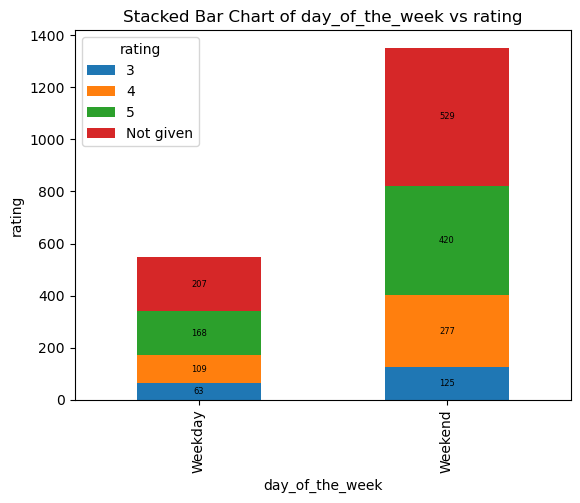

In [154]:
crosstab = pd.crosstab(data['day_of_the_week'], data['rating'])
plot = crosstab.plot(kind='bar', stacked=True)
plt.xlabel('day_of_the_week')
plt.ylabel('rating')
plt.title('Stacked Bar Chart of day_of_the_week vs rating')
plt.legend(title='rating')
for bar in plot.containers:
    plot.bar_label(bar, label_type='center',fontsize = 6)
plt.show()

* This shows that the ratings distribution percentage is similar on orders placed both on weekends or weekdays

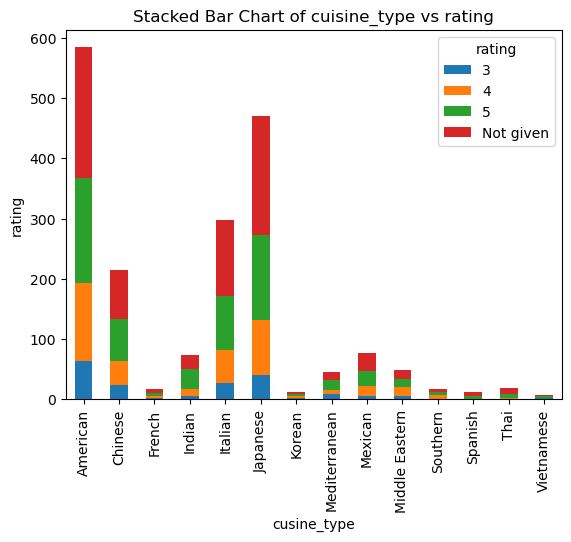

<Figure size 2000x800 with 0 Axes>

In [171]:
crosstab = pd.crosstab(data['cuisine_type'], data['rating'])
plot = crosstab.plot(kind='bar', stacked=True)
plt.xlabel('cusine_type')
plt.ylabel('rating')
plt.title('Stacked Bar Chart of cuisine_type vs rating')
plt.legend(title='rating')
# for bar in plot.containers:
#     plot.bar_label(bar, label_type='center',fontsize = 6)
plt.figure(figsize=(20,8))
plt.show()

* Orders are not rated across all the cuisine types but in various proporations like Japanese and Italaian have their around 42% orders not rated
* We can observe that the orders for Southern, Spanish, Thai, Vietnamese, French cuisines did not get at all or very less 3 rating.And overall also, 3 ratings are less across all cuisine types

## Lets explore the relationship between categorical and numerical variables

Text(0.5, 1.0, 'food_preparation_time vs day_of_the_week')

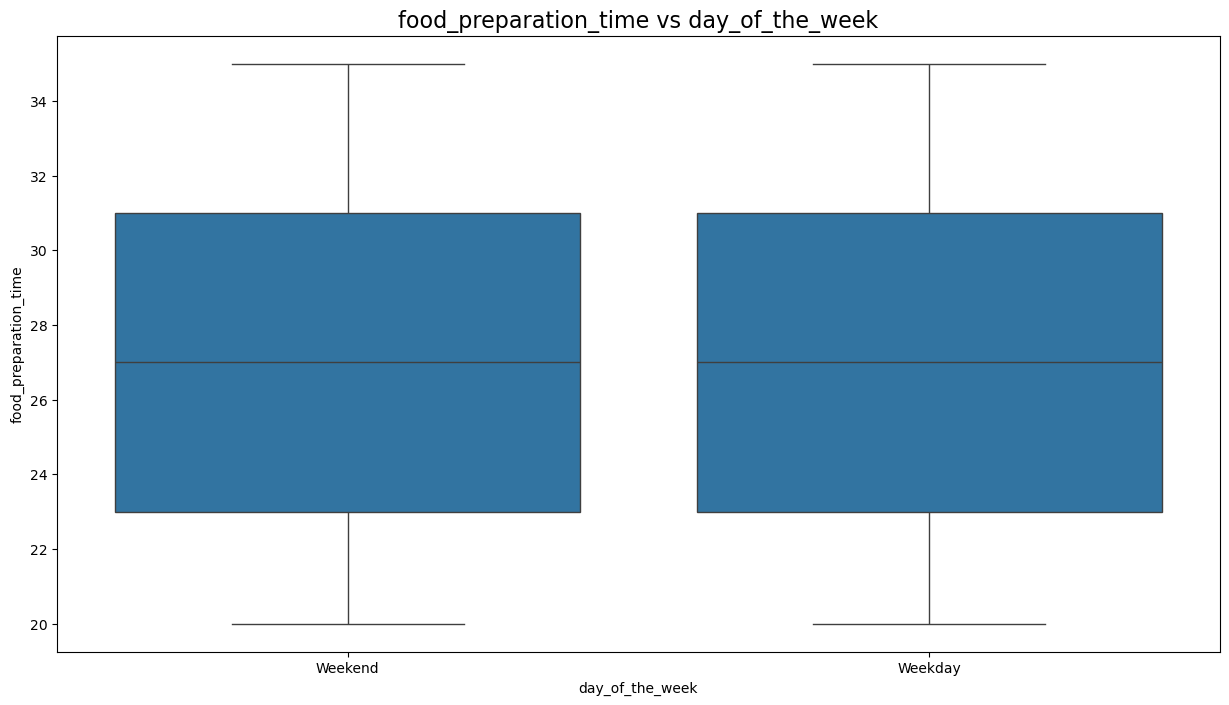

In [146]:
# Write the code here
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='day_of_the_week', y='food_preparation_time')
plt.title('food_preparation_time vs day_of_the_week',fontsize = 16)

* Similar to the rating , food preparation time also doesnt differ much whether it is an order placed and prepared on a weekday or weekend
* This also shows that despite the higher no of orders placed on weekends, the preparation time is maintained across both weekends and weekdays on an overall basis

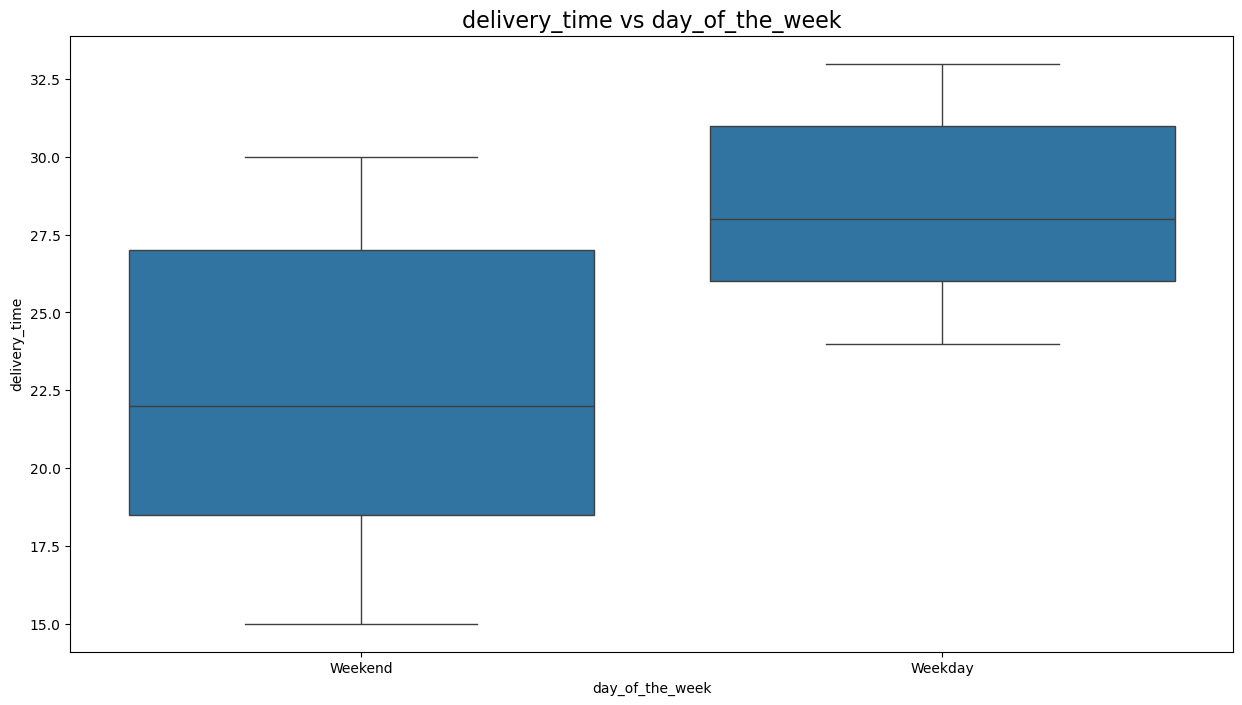

In [174]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time')
plt.title('delivery_time vs day_of_the_week',fontsize = 16)
plt.show()

* This boxplot shows that the delivery time takes lesser time on weekends rather than on weekdays.
* 50% of the deliveries takes less than or around 22 mins to get delivered on weekends whereas the same is around 28 mins for weekdays
* And also the maximun time taken for delivery for order is 33 mins for weekday vs 30 mins for weekend

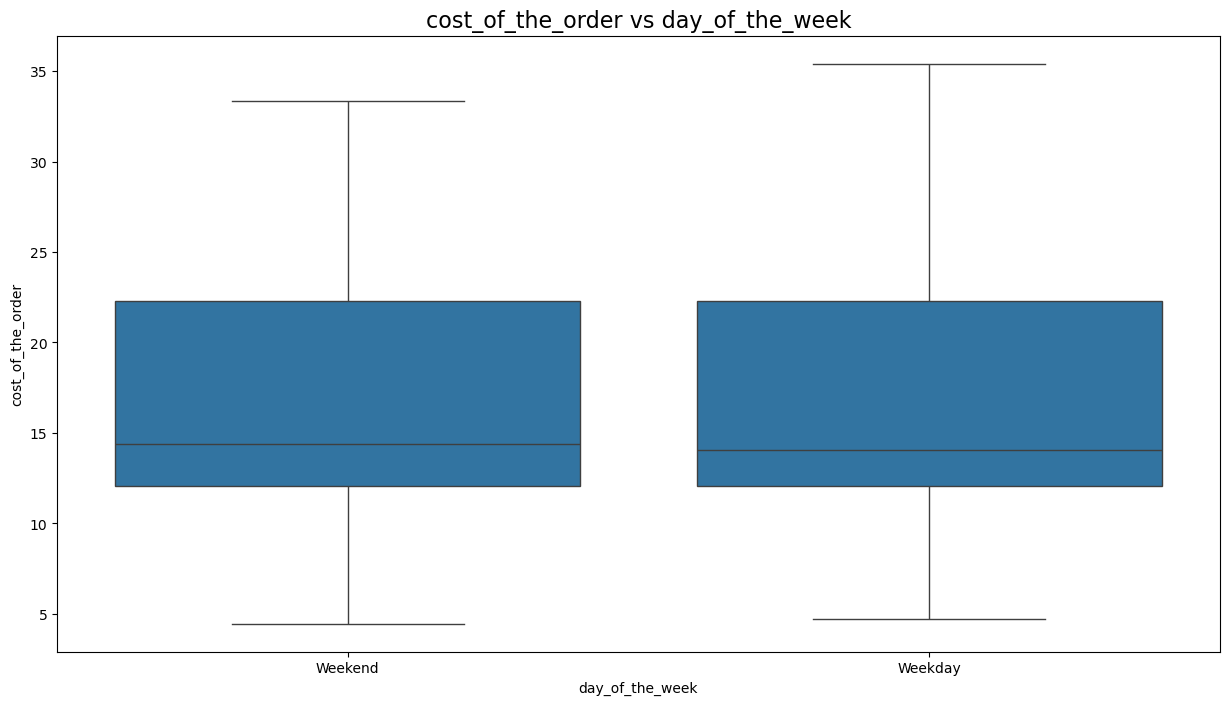

In [175]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='day_of_the_week', y='cost_of_the_order')
plt.title('cost_of_the_order vs day_of_the_week',fontsize = 16)
plt.show()

* The distribution of the order cost is quite similar for both weekends and weekdays and both of them are right skewed. However the meadian is slightly lower for weekday as compared to weeked which shows that 50% of the orders placed on weekdays are of slightly lesser price than that of weekends 
* But on the other hand the most expensive order is also placed on weekday.

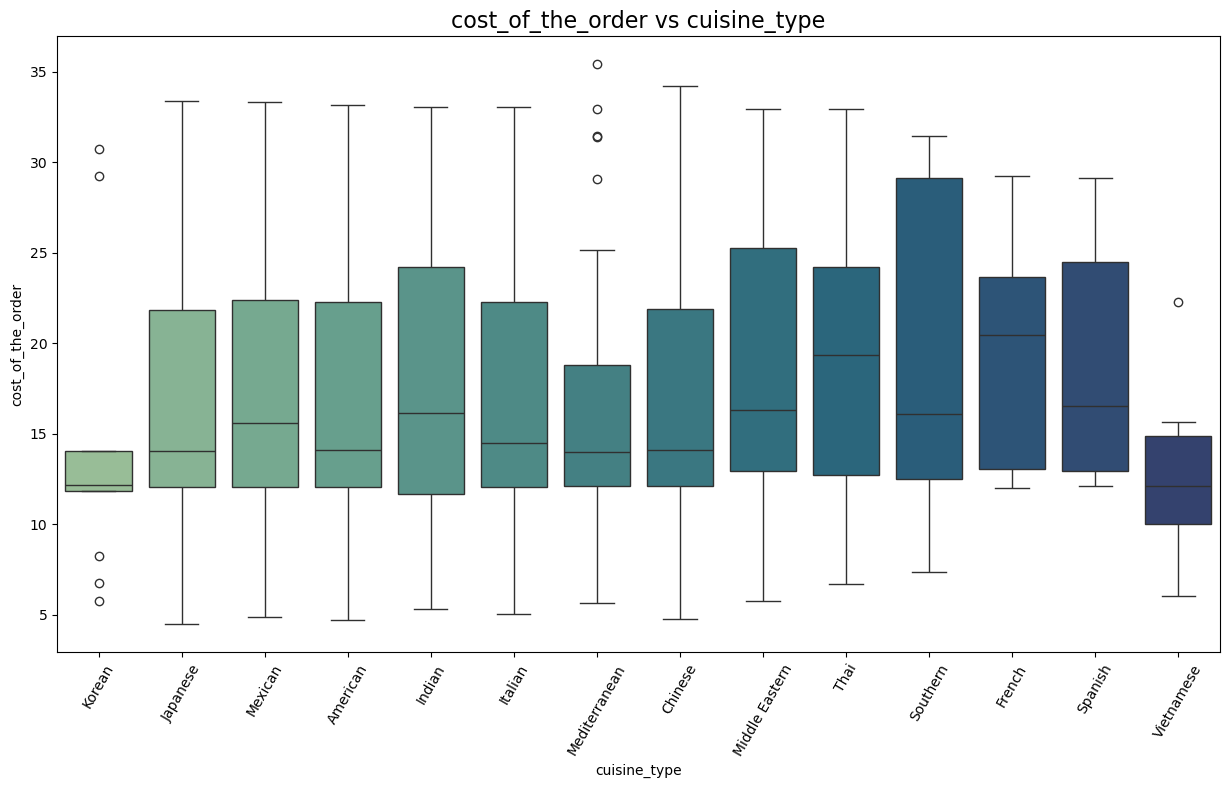

In [191]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order',palette = 'crest', hue = "cuisine_type")
plt.title('cost_of_the_order vs cuisine_type',fontsize = 16)
plt.xticks(rotation=60);
plt.show()

/var/folders/dj/k7yx0n7j265g3813k5z0366c0000gn/T/ipykernel_73118/3564960158.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='mean')


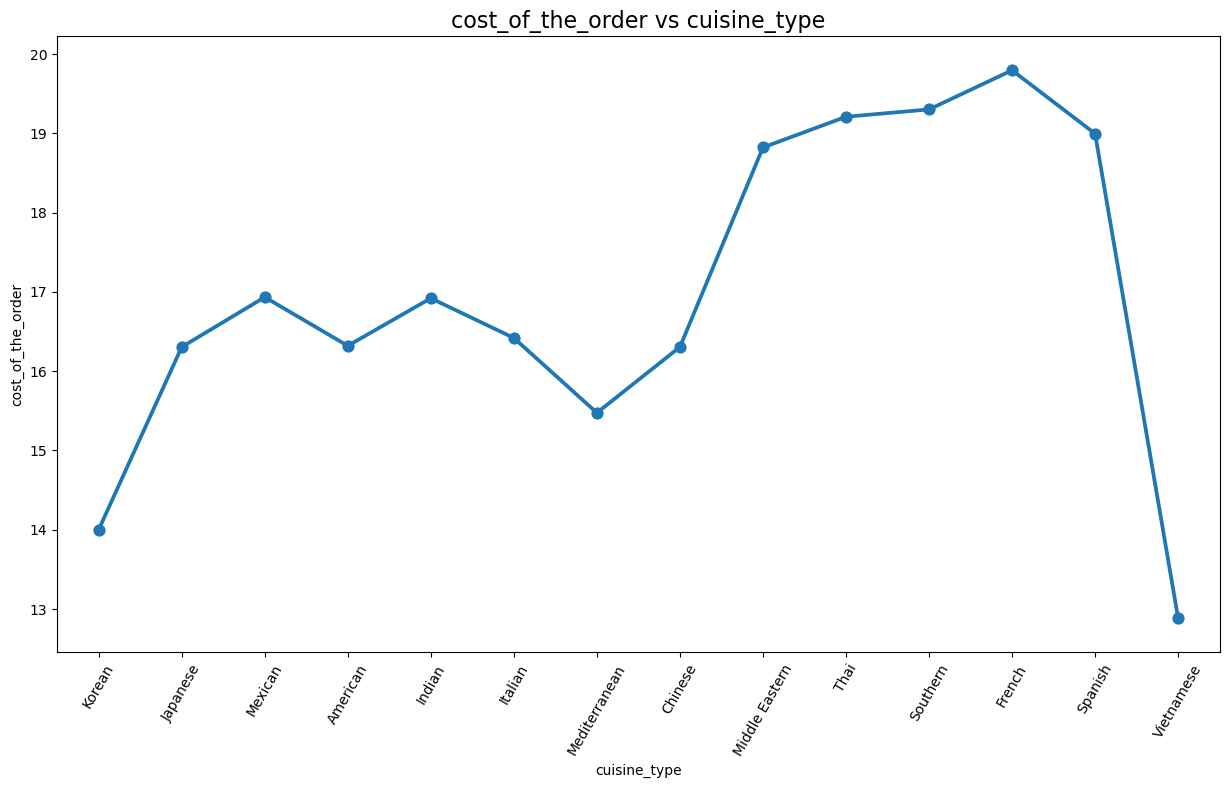

In [194]:
plt.figure(figsize=(15,8))
sns.pointplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='mean')
plt.xticks(rotation=60);
plt.title('cost_of_the_order vs cuisine_type',fontsize = 16)
plt.show()

* As per the boxplot, there are outliers present for Korean, Meditteranean and Vietnamese cuisines
* Southern cuisine has the meaximum range of cost for 50% of their orders i.e higher IQR ranging from approx. 12 to 27
* Median values are higher for French and Thai than rest which shows that 50% of these cuisine orders are arooix. below 20 and 18 respectively 
* Average cost of French,Southern, Thai, Spanish and Middle Eastern orders are higher than the rest of the cuisine types while Vietnames and Korean have lesser average order cost.

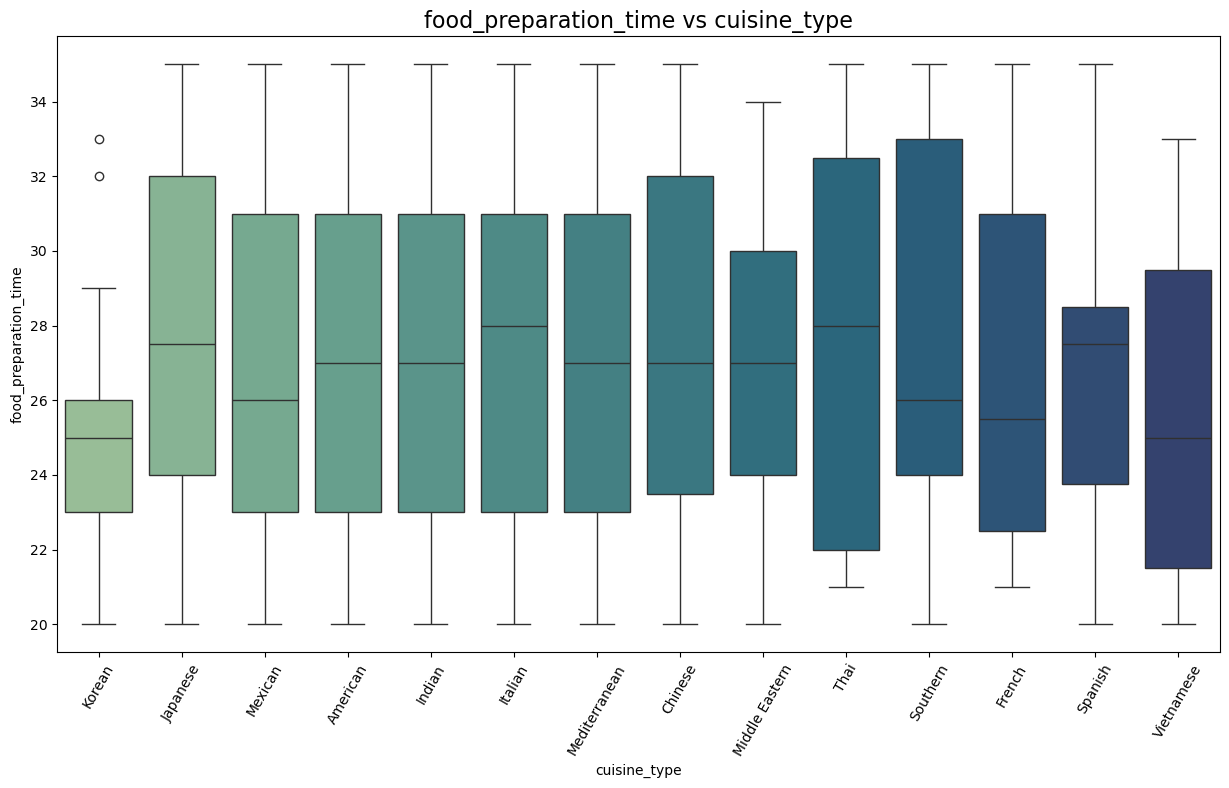

In [192]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time',palette = 'crest', hue = "cuisine_type")
plt.title('food_preparation_time vs cuisine_type',fontsize = 16)
plt.xticks(rotation=60);
plt.show()

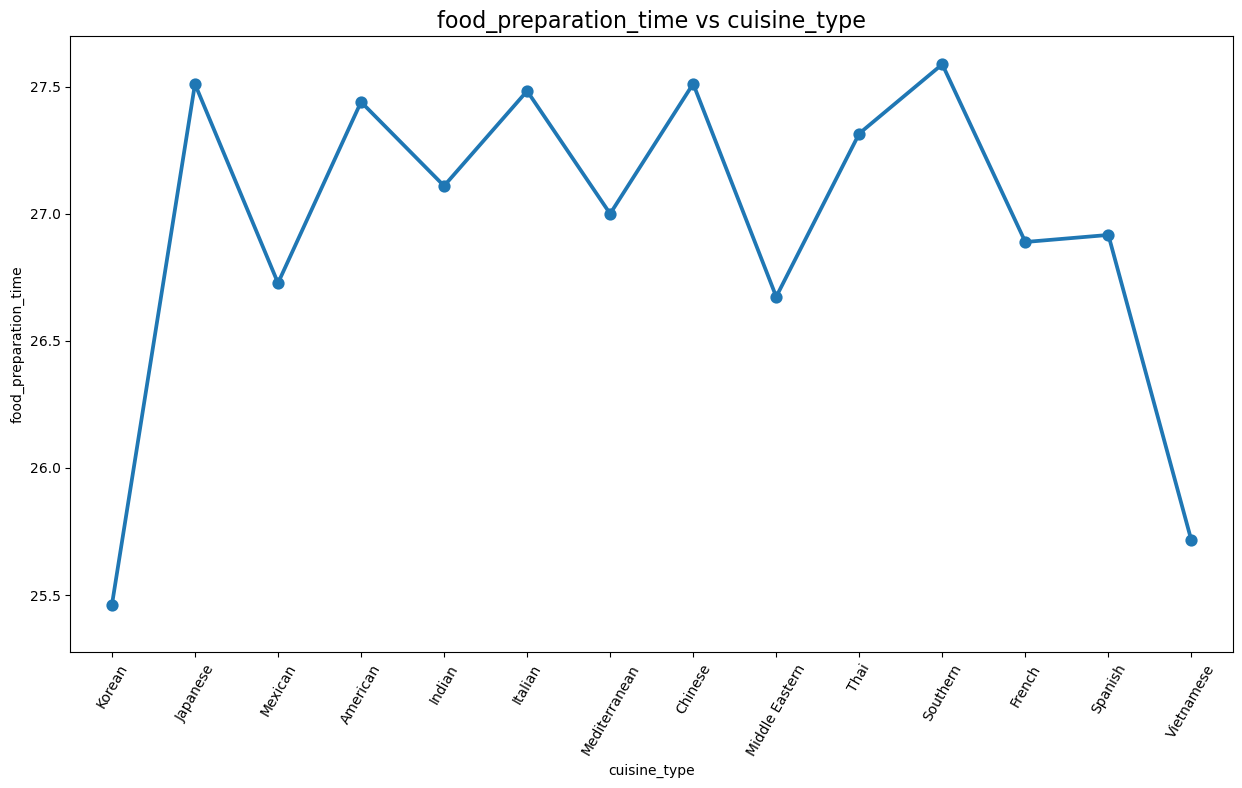

In [199]:
plt.figure(figsize=(15,8))
sns.pointplot(data=data, x='cuisine_type', y='food_preparation_time', errorbar=('ci', False), estimator='mean')
plt.xticks(rotation=60);
plt.title('food_preparation_time vs cuisine_type',fontsize = 16)
plt.show()

In [ ]:
* There are outliers present in the Korean cusine which means that there are few Korean cuisine orders which take more than the normal distribution
* Most of the boxes are of more or less nearly symmetrical distribution except few skewed distributions like French, southern, Thai, Korean etc.
* On an average, the food preparation time does not vary much across cuisines as seen from the point plot

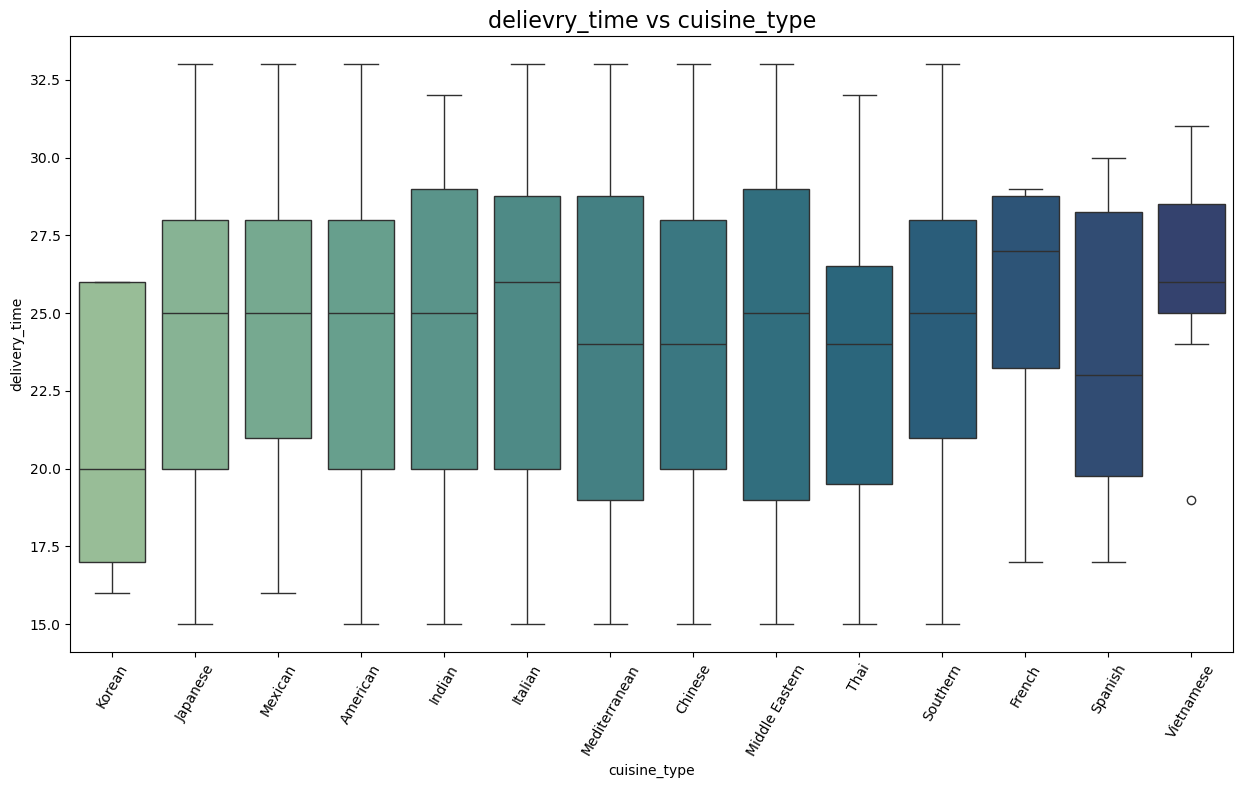

In [196]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='cuisine_type', y='delivery_time',palette = 'crest', hue = "cuisine_type")
plt.title('delievry_time vs cuisine_type',fontsize = 16)
plt.xticks(rotation=60);
plt.show()

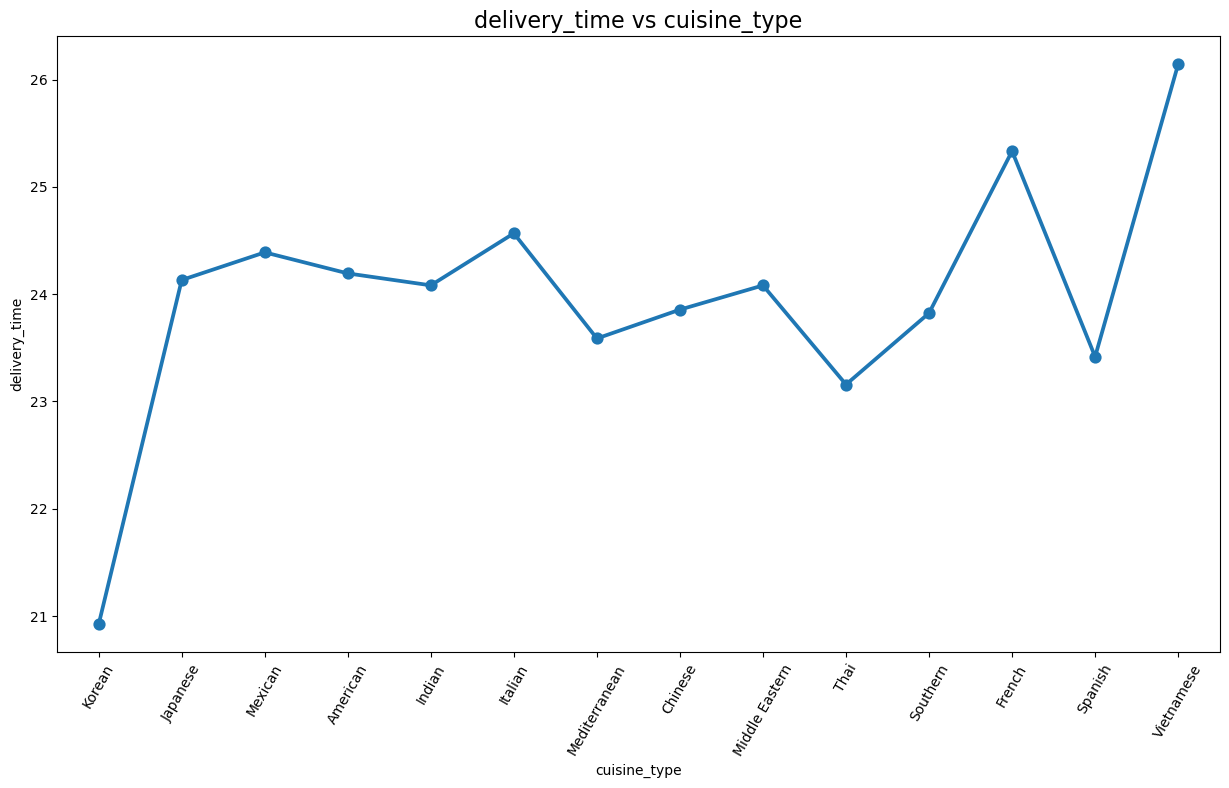

In [198]:
plt.figure(figsize=(15,8))
sns.pointplot(data=data, x='cuisine_type', y='delivery_time',errorbar=('ci', False), estimator='mean')
plt.xticks(rotation=60);
plt.title('delivery_time vs cuisine_type',fontsize = 16)
plt.show()

* Vietnamese and French has bit higher average delivery times while Korean has the lowest average delivery time among all
* Vietnamese has one outlier below Q1
* Median value for Korean is the lowest i.e around 20 while the same for French , Vietnamese are higher.
* But overall, all the delivery times range are more or less similar except Koran which has lower delivery times


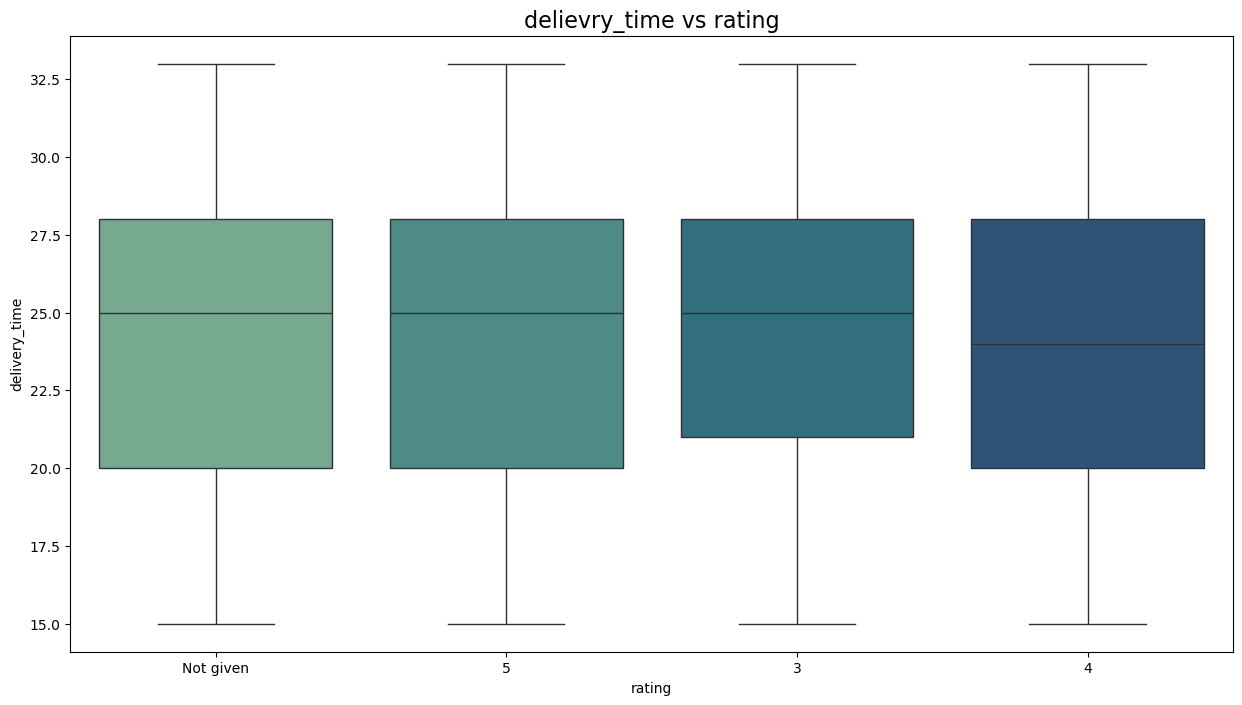

In [214]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='rating', y='delivery_time',palette = 'crest',hue='rating')
plt.title('delievry_time vs rating',fontsize = 16)
plt.show()

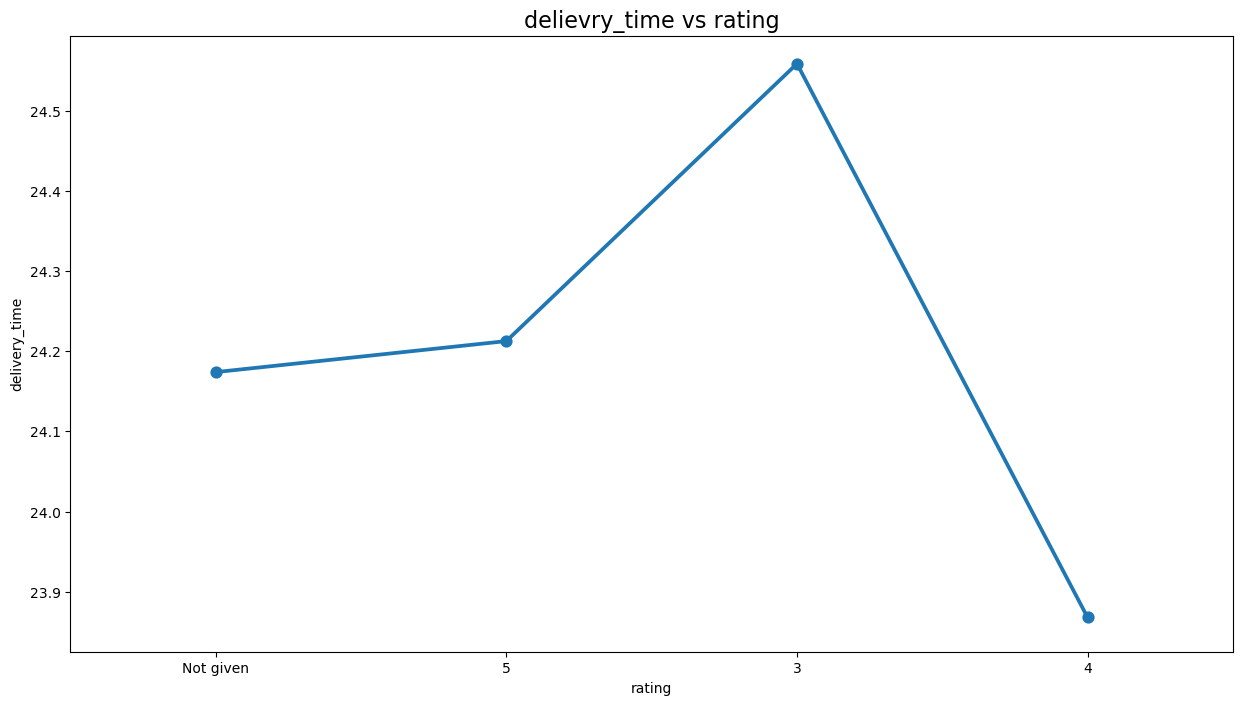

In [215]:
plt.figure(figsize=(15, 8))
sns.pointplot(x = 'rating', y = 'delivery_time', data = data,errorbar=('ci',False))
plt.title('delievry_time vs rating',fontsize = 16)
plt.show()


* Ratings do not seem to depend much on the delivery time as the distributions are more or less same in the boxplot
* Though the average delivery time is higher for rating 3, goes down for 4 but again it goes up for rating 5 and not rated. And moreover the difference is around 1 min.

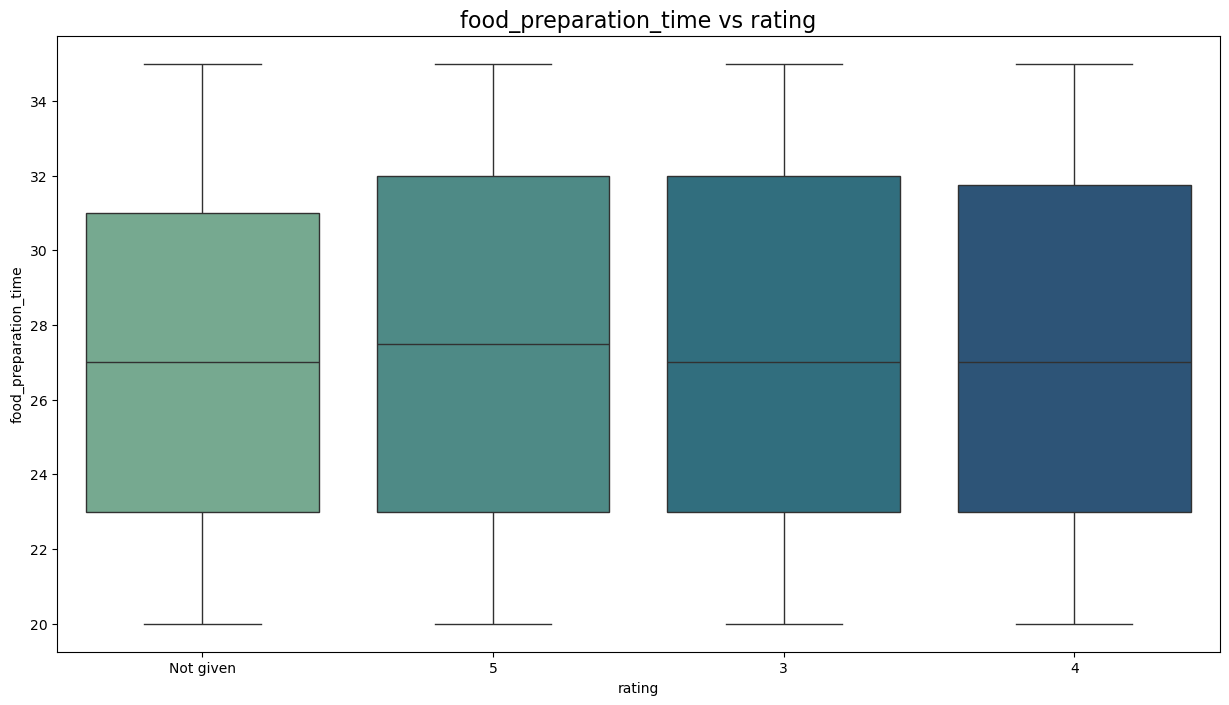

In [212]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='rating', y='food_preparation_time',palette = 'crest',hue='rating')
plt.title('food_preparation_time vs rating',fontsize = 16)
plt.show()

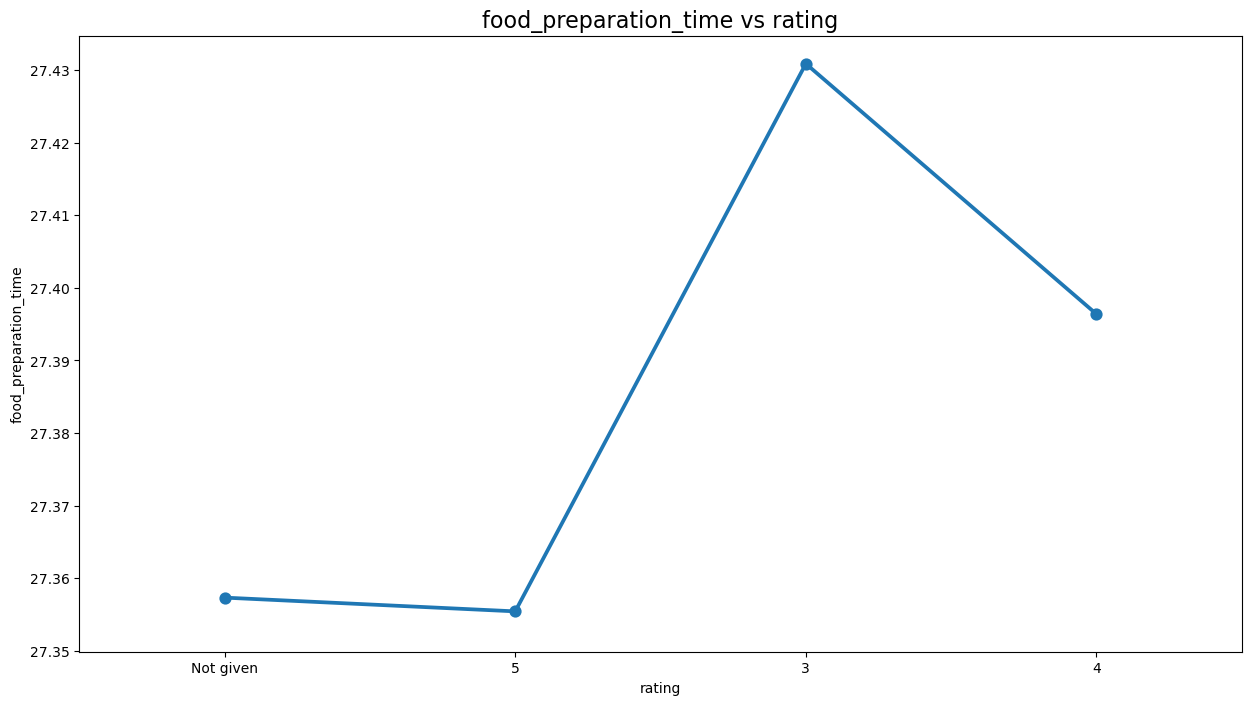

In [216]:
plt.figure(figsize=(15, 8))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = data,errorbar=('ci',False))
plt.title('food_preparation_time vs rating',fontsize = 16)
plt.show()

* The rating does not seem to depend hugely on food preparation time as the distribution is very similar across all rating with nearly same medianand quartiles.
* Even though the lineplot shows a huge rise for rating 3 but the value difference is within seconds for average of the orders

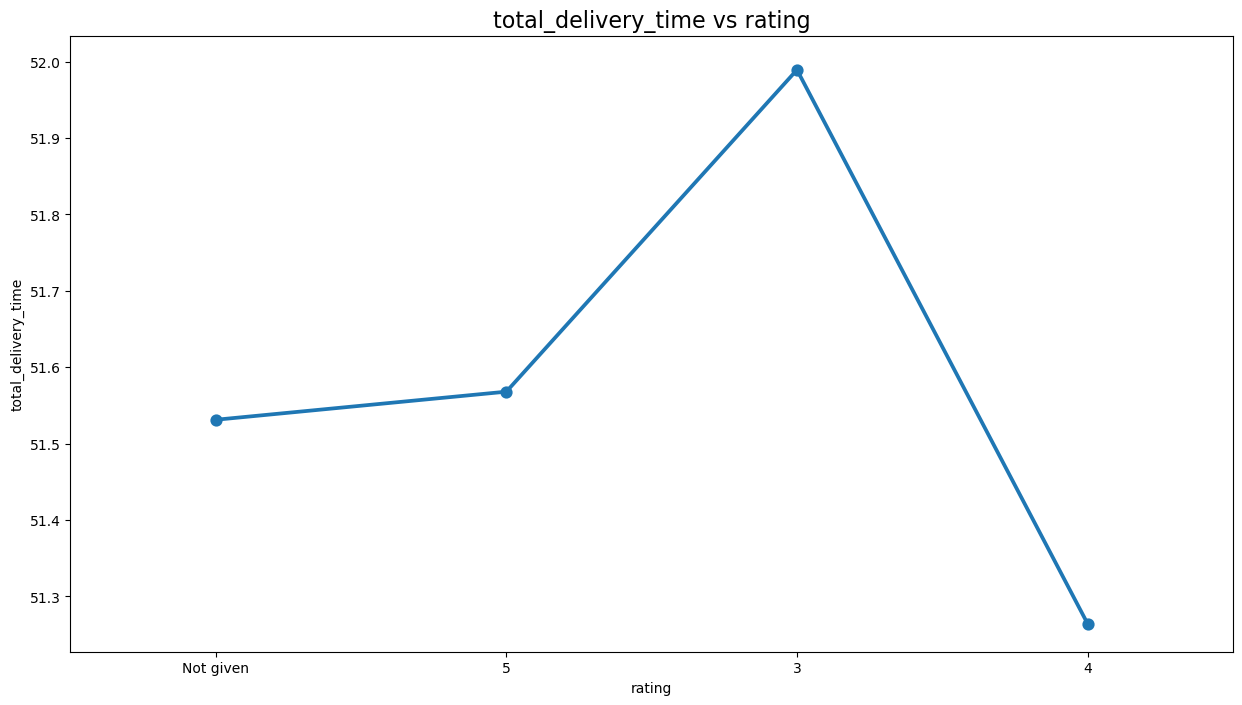

In [218]:
data_copy=data.copy() ## Creating a copy of the data to calculate the total delivery time and check the relationship
data_copy['total_delivery_time'] = data_copy['delivery_time'] + data_copy['food_preparation_time']
plt.figure(figsize=(15, 8))
sns.pointplot(x = 'rating', y = 'total_delivery_time', data = data_copy,errorbar=('ci',False))
plt.title('total_delivery_time vs rating',fontsize = 16)
plt.show()

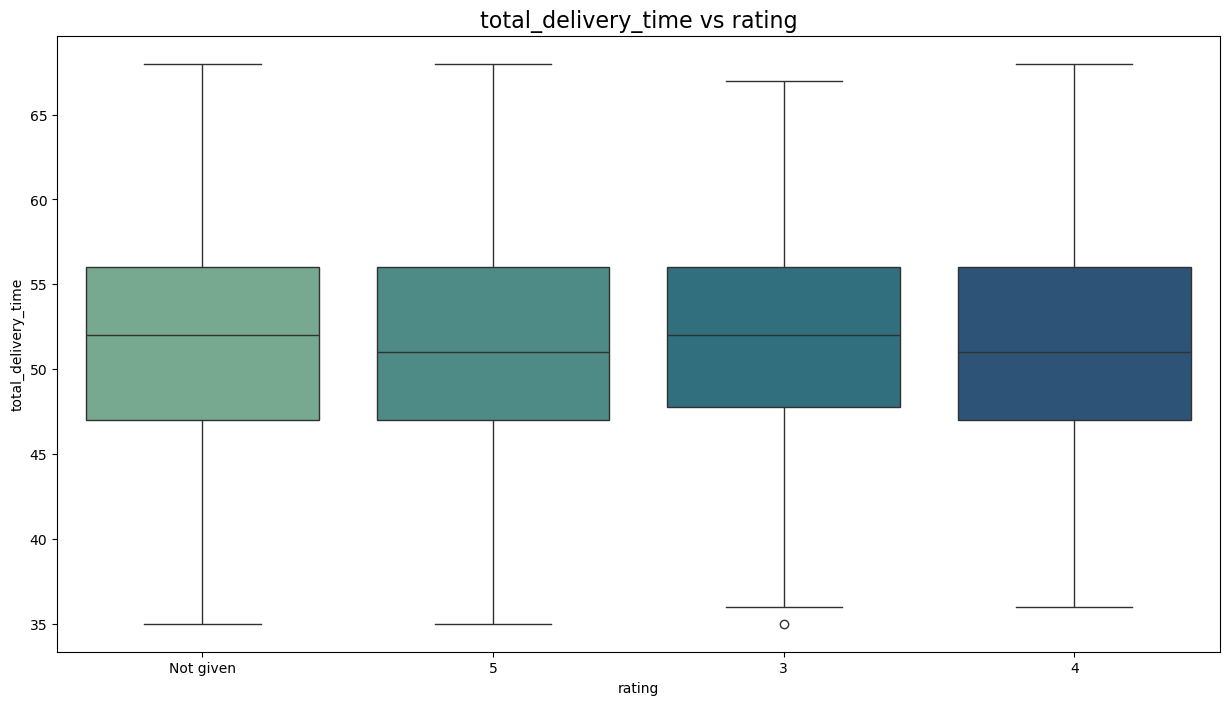

In [219]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_copy, x='rating', y='total_delivery_time',palette = 'crest',hue='rating')
plt.title('total_delivery_time vs rating',fontsize = 16)
plt.show()

* This confirms that the rating do not depend much on the delivery and food prepartaion time as the time difference between various ratings is hardly within mins.

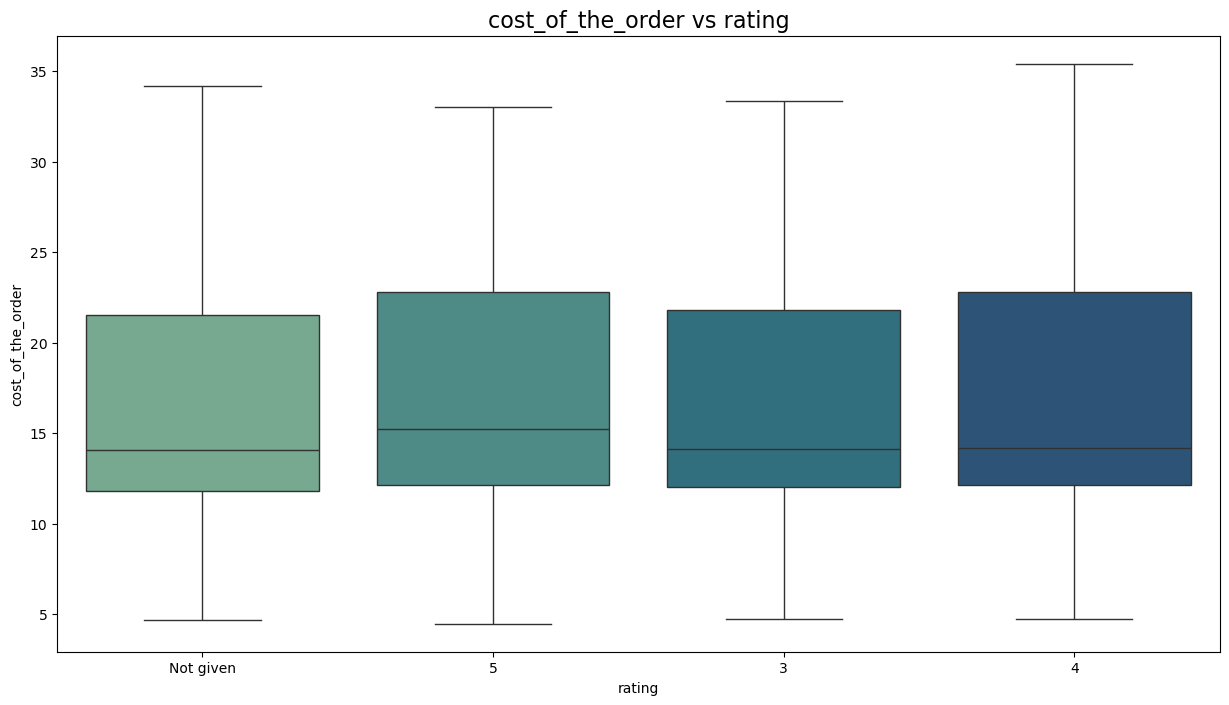

In [220]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='rating', y='cost_of_the_order',palette = 'crest',hue='rating')
plt.title('cost_of_the_order vs rating',fontsize = 16)
plt.show()

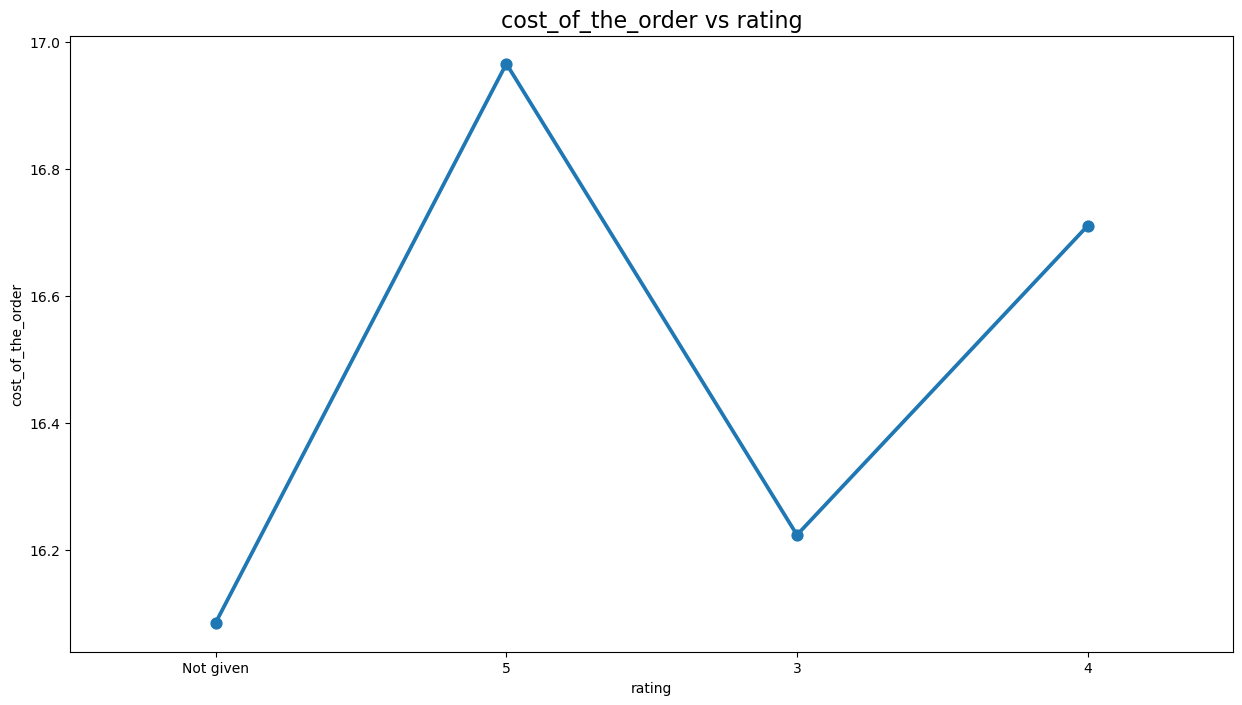

In [224]:
plt.figure(figsize=(15, 8))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = data,errorbar=('ci',False))
plt.title('cost_of_the_order vs rating',fontsize = 16)
plt.show()

* Median Cost of the order is less for all the ratings including not rated ones i.e below or equal to 15
* In the box plot the box for not rated is very similar to rating 3 as in their Q1, Q2 and Q3 values
* On an average the cost of the order do not vary much across ratings and not rated ones

### Lets check the correlation between the numuerical variables

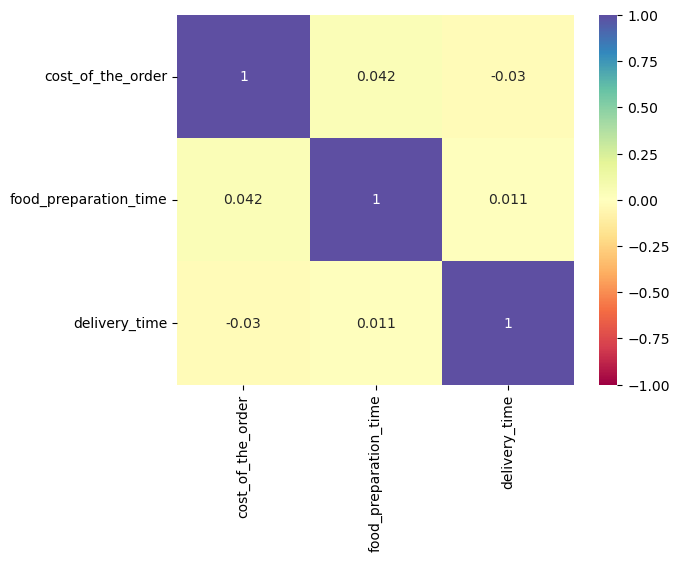

In [7]:
num_corr = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(data = num_corr, annot = True,cmap = 'Spectral',vmin=-1,vmax=1);

* From the heatmap we can observe that there is no correlation among these variables

### Lets check the top restaurants as per rating and revenue generation

In [243]:
rated_data = data[data['rating'] != 'Not given'].copy() # This is to filter the dataframe for those rows with valid rating values and creating a copy of the same for further calculations
rated_data['rating'] = rated_data['rating'].astype('int')# This is to convert the 
top_res_rating =rated_data.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).head(15)
top_res_rating

restaurant_name
'wichcraft                      5.00
Ravagh Persian Grill            5.00
Chola Eclectic Indian Cuisine   5.00
Chote Nawab                     5.00
Junoon                          5.00
Socarrat Paella Bar             5.00
DespaÌ±a                        5.00
Dig Inn Seasonal Market         5.00
Saravanaa Bhavan                5.00
Donburi-ya                      5.00
Dos Caminos                     5.00
Dos Caminos Soho                5.00
Samurai Mama                    5.00
El Parador Cafe                 5.00
Prosperity Dumpling             5.00
Name: rating, dtype: float64

In [245]:
top_res_revenue =rated_data.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(15)
top_res_revenue

restaurant_name
Shake Shack                             2225.20
The Meatball Shop                       1495.65
Blue Ribbon Sushi                       1170.66
Blue Ribbon Fried Chicken               1130.59
RedFarm Broadway                         680.69
Parm                                     655.52
RedFarm Hudson                           566.86
Rubirosa                                 450.66
TAO                                      421.16
Momoya                                   365.78
Nobu Next Door                           362.57
Five Guys Burgers and Fries              334.79
Chipotle Mexican Grill $1.99 Delivery    327.91
Han Dynasty                              324.91
Tamarind TriBeCa                         322.81
Name: cost_of_the_order, dtype: float64

* We can observe that the top 5 restaurants which are featured here are also present in the top list of restaurants as per the orders, so the orders for these restaurants are higher than the rest which contributes to its high revenue generation

,restaurant_name,cuisine_type,cost_of_the_order,Revenue
229,Sarabeth's East,American,9.41,1.41
495,Terakawa Ramen,Japanese,8.54,1.28
301,Woorijip,Korean,8.25,1.24
392,Waverly Diner,American,6.84,1.03
81,Cafeteria,American,6.69,1.00
1626,The Odeon,American,6.69,1.00
1476,Blue Ribbon Brooklyn,American,5.97,0.90
313,Haveli Indian Restaurant,Indian,5.72,0.86
372,Sarabeth's East,American,5.72,0.86
941,brgr,American,5.72,0.86


In [179]:
filtered_data.groupby('restaurant_name')['Revenue'].sum()

restaurant_name
Blue Ribbon Brooklyn         14.62
Byblos Restaurant            12.37
Cafeteria                    20.81
Don's Bogam BBQ & Wine Bar    5.84
Go! Go! Curry!               15.41
Haveli Indian Restaurant      8.13
Nha Trang One                 2.35
Pepe Giallo                   2.19
Pylos                        17.68
Sarabeth's East              22.35
Sarabeth's West               2.12
Sushi Choshi                  2.06
Terakawa Ramen                6.42
The Odeon                     5.03
Waverly Diner                18.25
Woorijip                      1.24
brgr                          2.97
Name: Revenue, dtype: float64

In [190]:
(data.groupby('restaurant_name')['Revenue'].sum()).sort_values(ascending =False).tail(51)

restaurant_name
Piccolo Angolo                  5.29
The Odeon                       5.03
DespaÌ±a                        4.96
Izakaya Ten                     4.70
Big Daddy's                     4.04
Mira Sushi                      3.73
Bukhara Grill                   3.56
Olive Garden                    3.43
Xe May Sandwich Shop            3.30
brgr                            2.97
Haandi                          2.82
Zero Otto Nove                  2.71
Anjappar Chettinad              2.47
Chote Nawab                     2.42
Galli Restaurant                2.41
Cafe de La Esquina              2.41
Taro Sushi                      2.41
Paul & Jimmy's                  2.41
Spice Thai                      2.38
Crema Restaurante               2.38
Dig Inn Seasonal Market         2.36
Nha Trang One                   2.35
Le Zie 2000 Trattoria           2.32
Moonstruck on Second            2.24
Pepe Giallo                     2.19
Wo Hop Restaurant               2.12
Sarabeth's West       

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [252]:
rated_data = data[data['rating'] != 'Not given'].copy() # This is to filter the dataframe for those rows with valid rating values and creating a copy of the same for further calculations
rated_data['rating'] = rated_data['rating'].astype('int') # Converting the column to int type to do calculations

In [265]:
data_rating_count = rated_data.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
data_rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [266]:
rest_names = data_rating_count[data_rating_count['rating']>50]['restaurant_name']
data_avg_more_than_4 = rated_data[rated_data['restaurant_name'].isin(rest_names)].copy()

data_mean_rating = data_avg_more_than_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating
df_avg_rating_greater_than_4 = data_mean_rating[data_mean_rating['rating'] > 4].sort_values(by='restaurant_name', ascending=False).reset_index(drop=True)
df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Shake Shack,4.28
2,Blue Ribbon Sushi,4.22
3,Blue Ribbon Fried Chicken,4.33


In [267]:
# Using one liner as an alternative
rated_data.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index().query('mean > 4.0 and count > 50')

,restaurant_name,count,mean
16,Blue Ribbon Fried Chicken,64,4.33
17,Blue Ribbon Sushi,73,4.22
117,Shake Shack,133,4.28
132,The Meatball Shop,84,4.51


#### Observations:
There are four restaurants which has no of ratings more than 50 and their average rating is greater than 4

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [282]:
#function to determine the revenue
def compute_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

data['net_revenue'] = data['cost_of_the_order'].apply(compute_revenue)
data.head()
data['net_revenue']

0      7.69
1      1.81
2      1.83
3      7.30
4      1.74
       ... 
1893   5.58
1894   1.83
1895   6.30
1896   1.83
1897   2.92
Name: net_revenue, Length: 1898, dtype: float64

In [283]:
total_revenue = data['net_revenue'].sum()
print("The Total revenue generated by the company across all the orders is around",round(total_revenue,2),"dollars")

The Total revenue generated by the company across all the orders is around 6166.3 dollars


#### Observations:
The company is earning revenue on all the orders as all of them are atleast greater than 5 dollars. And the total revenue generated from all the orders is around 6166 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [274]:
# Write the code here
data['total_deliver_time']=data['food_preparation_time']+data['delivery_time']
percentage_of_orders =(((data['total_deliver_time'] >60).sum()/len(data))*100).round(2)
print(f"The percentage of orders that take more than 60 mins to get delivered is {percentage_of_orders}%")

The percentage of orders that take more than 60 mins to get delivered is 10.54%


#### Observations:
Around 10% of orders take more than 60 mins to get delivered to the customer from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [136]:
# Write the code here
print('The mean delivery time on weekdays is around',
      round(data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [137]:
print('The mean delivery time on weekdays is around',
      round(data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 22 minutes


#### Observations:
The mean delivery time is around 28 mins on weekdays and around 22 mins on weekends and this shows that the delivery takes higher time on weekdays than weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are 1898 rows and 9 columns in the food hub order dataset
* Shake Shack is the top restaurant which has received the highest no of orders. The Meatball Shop and Blue Ribbon   Sushi are the next larget restaurants
* The top 3 cuisine types are American, Japanese and Italian. American being the most popular of all. The bottom 3   cuisine types are Vietnamese, Spanish and Korean.
* The average cost of the order is 16.5 dollars. And 50% of the orders are priced between 12 to 22.
* Most of the ratings are on the higher side and there are no ratings below 3. But there are 76 orders which are not rated which might indicate that the customers either didnt bother or didnt want to rate because of less engagement or satisfaction
* The percentage of orders received cost above 20 dollars is around 29%
* On an average an order takes ~24 mins to be delivered to the customer
* Average cost of French,Southern, Thai, Spanish and Middle Eastern orders are higher than the rest of the cuisine   types
* Average rating of Spanish and Thai orders are higher as compared to others while Vietnamese and Korean have    received lowest average of ratings.
* No of orders placed on weekends are higher as compared to weekdays
* The mean delivery time is around 28 mins on weekdays and around 22 mins on weekends and this shows that the   delivery takes higher time on weekdays than weekends.
* Around 10% of the orders take more than 60 mins to get delivered to the customer from the time the order is placed.
* There is no much correlation among the variables that means ratings do not have a high dependency on ony of the variables

### Recommendations:

* Strengthen the collaboration with existing restaurants which provides top cuisine types like American, Japanese, Italian. And also look for new collaboration for these top performing cuisine types
* Collaborate with those restaurants that provides French,Spanish and Thai cuisines as generally these have higher average costs and good ratings
* The company should prioritize revisiting collaboration with low performing restaurants(low revenue)


---